In [503]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pointbiserialr
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [504]:
df = pd.read_excel('25.xlsx')
df.drop(['car_ID', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34'], axis = 1, inplace = True)
df.dropna(inplace = True)
df_flo = df.drop(['fueltype_num','aspiration_num','carbody_num','drivewheel_num','enginetype_num','fuelsystem_num'], axis=1)

### Дескриптивный анализ

In [505]:
df.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  150.000000  150.000000  150.000000  150.000000  150.000000   
mean     0.766667   98.641333  173.995333   65.930667   53.640000   
std      1.250056    5.743992   11.880627    2.104420    2.368671   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.800000   64.200000   52.000000   
50%      1.000000   97.200000  173.200000   65.500000   53.800000   
75%      2.000000  102.300000  181.650000   66.900000   55.500000   
max      3.000000  115.600000  202.600000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   150.000000  150.000000  150.000000  150.000000        150.000000   
mean   2548.053333  126.373333    3.323267    3.263100         10.093400   
std     509.993720   39.867995    0.258315    0.306929          3.980116   
min    1488.000000   61.000000    2.680000    2.190000          7.000000   
25%    2174.250000   98.000000    3.150000    3.110000          8.500000   
50%    2412.000000  120.000000    3.310000    3.290000          9.000000   
75%    2947.750000  141.000000    3.570000    3.400000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg  cylindernumber  \
count  150.000000   150.000000  150.000000  150.000000      150.000000   
mean   104.900000  5156.000000   25.086667   30.706667        4.393333   
std     40.765782   467.031178    6.559932    6.921949        1.116662   
min     48.000000  4150.000000   13.000000   17.000000        2.000000   
25%     70.000000  4800.000000   19.000000   25.000000        4.000000   
50%     95.000000  5200.000000   24.000000   30.000000        4.000000   
75%    116.000000  5500.000000   30.000000   34.000000        4.000000   
max    288.000000  6600.000000   47.000000   53.000000       12.000000   

       doornumber         price  
count  150.000000    150.000000  
mean     3.133333  13243.224447  
std      0.994391   7683.596997  
min      2.000000   5151.000000  
25%      2.000000   7823.000000  
50%      4.000000  10120.000000  
75%      4.000000  16547.250000  
max      4.000000  41315.000000

In [506]:
df.describe(exclude = np.number)

fueltype_num aspiration_num carbody_num drivewheel_num enginetype_num  \
count           150            150         150            150            150   
unique            2              2           5              3              7   
top             gas            std       sedan            fwd            ohc   
freq            136            125          78             89            108   

       fuelsystem_num  
count             150  
unique              7  
top              mpfi  
freq               73

Text(0.5, 0, 'price')

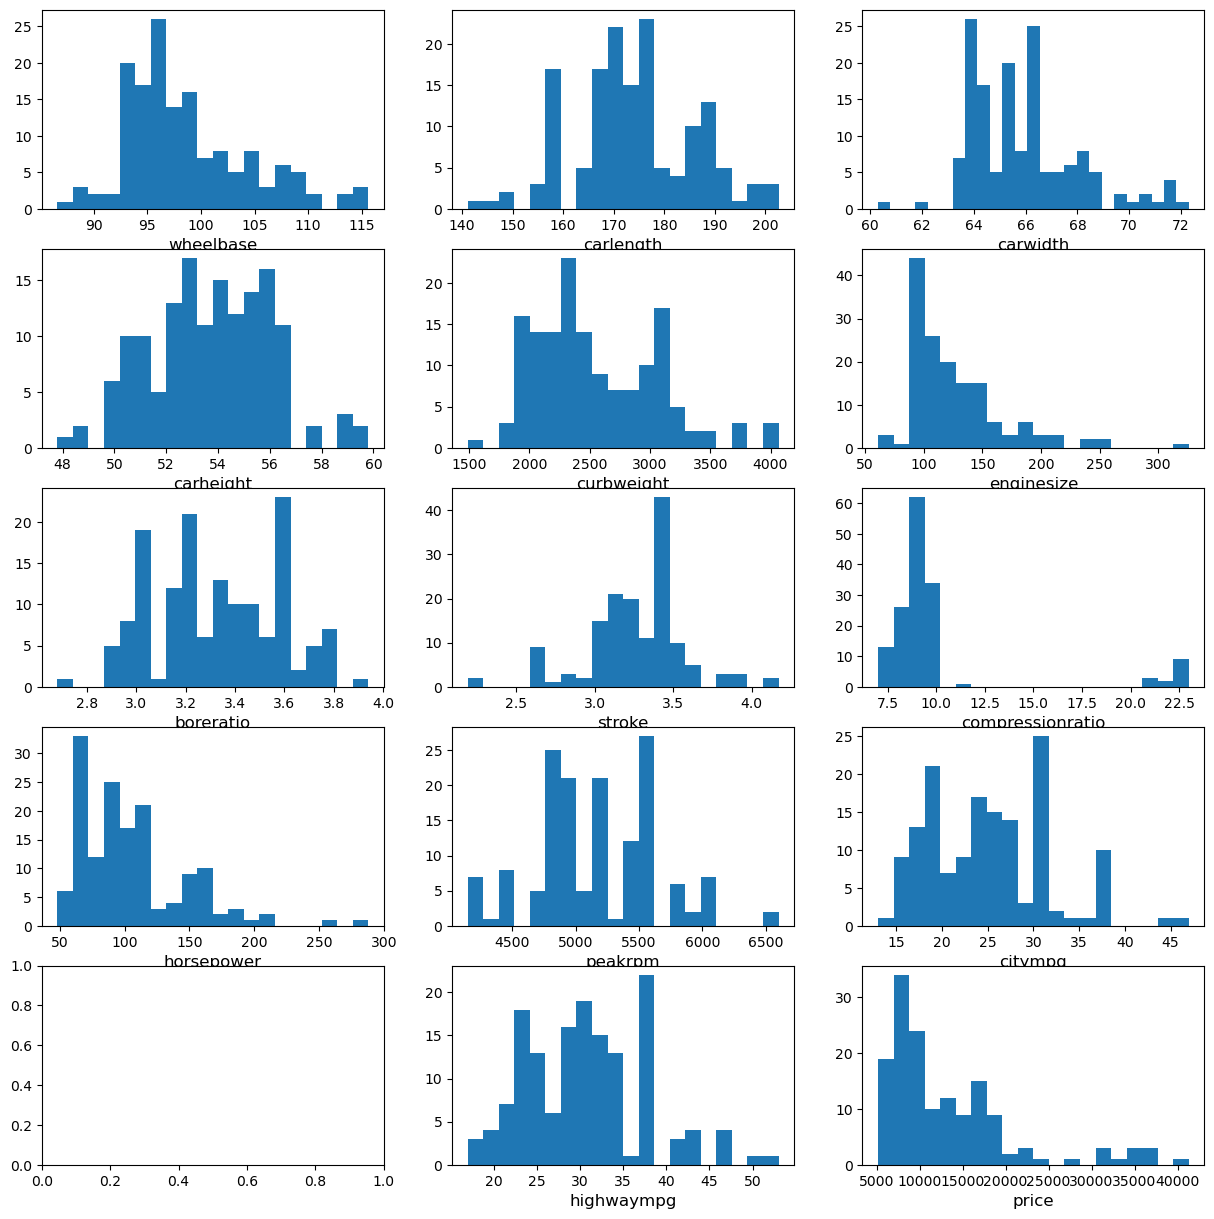

In [507]:
fig, ax = plt.subplots(5, 3, figsize=(15, 15))

ax[0, 0].hist(df['wheelbase'], bins=20)
ax[0, 0].set_xlabel('wheelbase', fontsize=12)

ax[0, 1].hist(df['carlength'], bins=20) 
ax[0, 1].set_xlabel('carlength', fontsize=12)

ax[0, 2].hist(df['carwidth'], bins=25) 
ax[0, 2].set_xlabel('carwidth', fontsize=12)

ax[1, 0].hist(df['carheight'], bins=20) 
ax[1, 0].set_xlabel('carheight', fontsize=12)

ax[1, 1].hist(df['curbweight'], bins=20) 
ax[1, 1].set_xlabel('curbweight', fontsize=12)

ax[1, 2].hist(df['enginesize'], bins=20) 
ax[1, 2].set_xlabel('enginesize', fontsize=12)

ax[2, 0].hist(df['boreratio'], bins=20) 
ax[2, 0].set_xlabel('boreratio', fontsize=12)

ax[2, 1].hist(df['stroke'], bins=20) 
ax[2, 1].set_xlabel('stroke', fontsize=12)

ax[2, 2].hist(df['compressionratio'], bins=20) 
ax[2, 2].set_xlabel('compressionratio', fontsize=12)

ax[3, 0].hist(df['horsepower'], bins=20) 
ax[3, 0].set_xlabel('horsepower', fontsize=12)

ax[3, 1].hist(df['peakrpm'], bins=20) 
ax[3, 1].set_xlabel('peakrpm', fontsize=12)

ax[3, 2].hist(df['citympg'], bins=20) 
ax[3, 2].set_xlabel('citympg', fontsize=12)

ax[4, 1].hist(df['highwaympg'], bins=20) 
ax[4, 1].set_xlabel('highwaympg', fontsize=12)

ax[4, 2].hist(df['price'], bins=20) 
ax[4, 2].set_xlabel('price', fontsize=12)


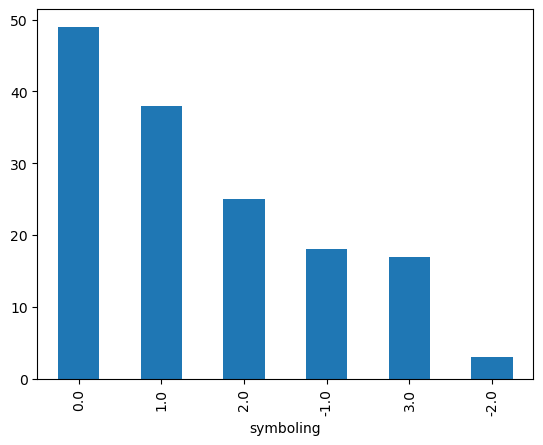

In [508]:
df["symboling"].value_counts().plot(kind = 'bar');

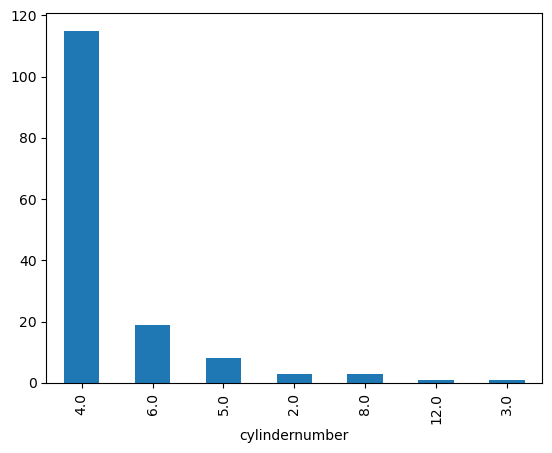

In [509]:
df["cylindernumber"].value_counts().plot(kind = 'bar');

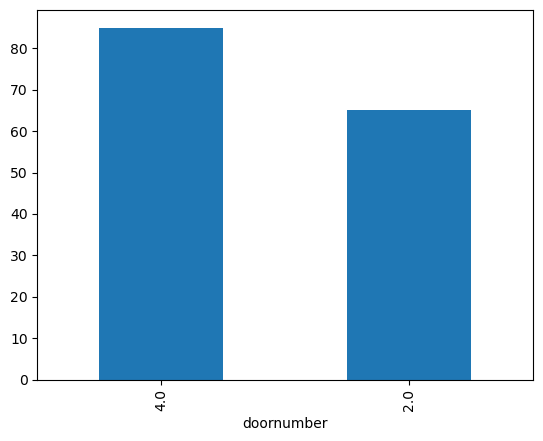

In [510]:
df["doornumber"].value_counts().plot(kind = 'bar');

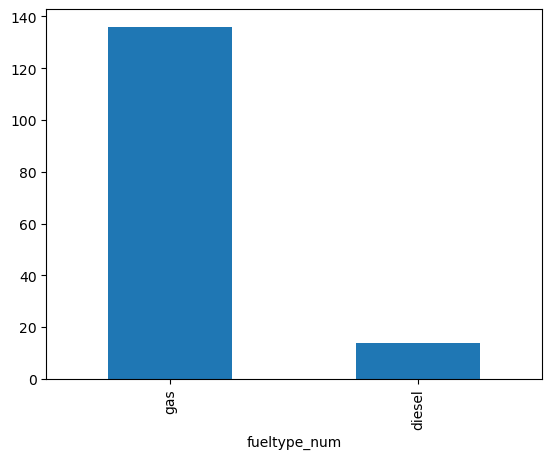

In [511]:
df["fueltype_num"].value_counts().plot(kind = 'bar');

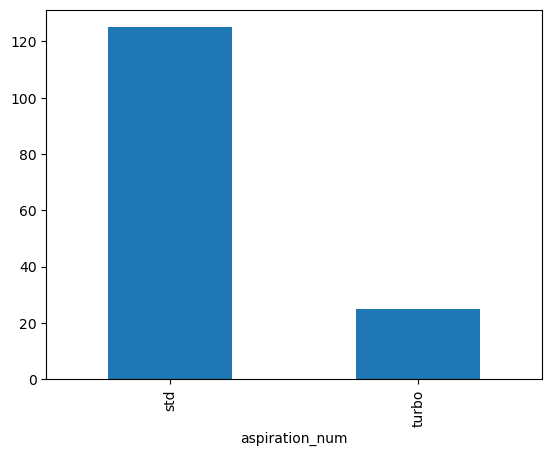

In [512]:
df["aspiration_num"].value_counts().plot(kind = 'bar');

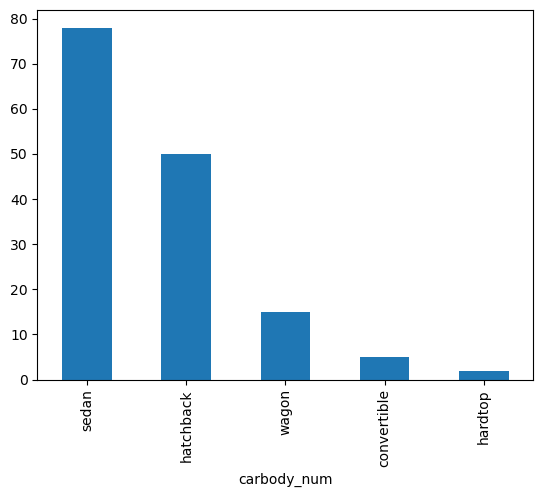

In [513]:
df["carbody_num"].value_counts().plot(kind = 'bar');

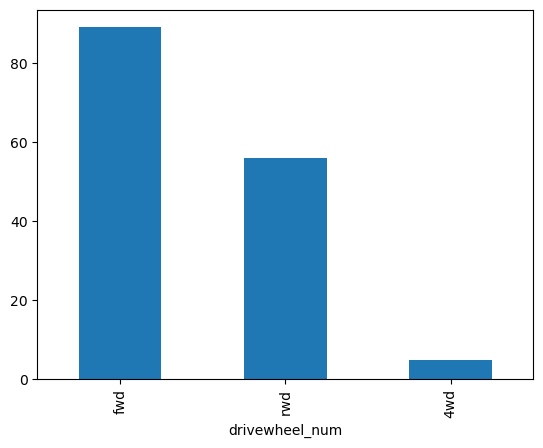

In [514]:
df["drivewheel_num"].value_counts().plot(kind = 'bar');

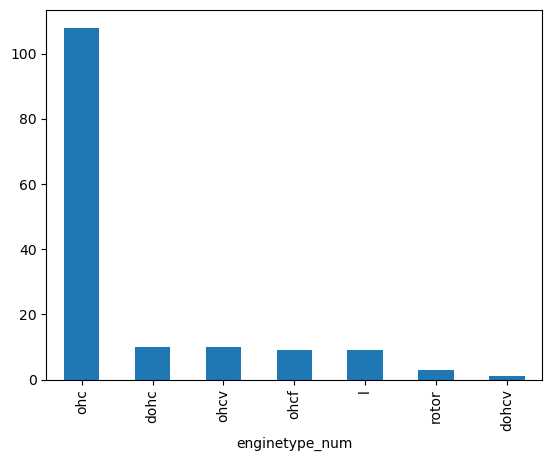

In [515]:
df["enginetype_num"].value_counts().plot(kind = 'bar');

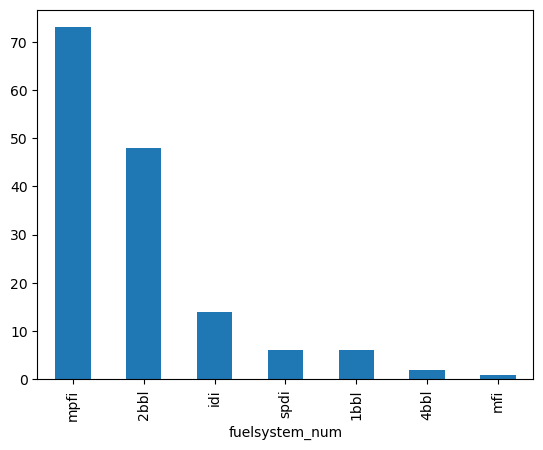

In [516]:
df["fuelsystem_num"].value_counts().plot(kind = 'bar');

### Обработка данных

In [517]:
#перекодируем дамми
df_obj = df[['fueltype_num','aspiration_num','carbody_num','drivewheel_num','enginetype_num','fuelsystem_num']]
for name in df_obj.columns:
    for ob in df_obj[name].unique():
        df_obj = df_obj.assign(Name=ob)
        for t in range(150):
            if df_obj.loc[t, name] == ob:
                df_obj.loc[t, ob] = 1
            else: df_obj.loc[t, ob] = 0

df_obj.drop(['fueltype_num','aspiration_num','carbody_num','drivewheel_num','enginetype_num','fuelsystem_num','Name'], axis=1, inplace=True)

In [518]:
#очистим от выбросов
df_clean = pd.DataFrame(columns = df_flo.drop(['symboling','cylindernumber','doornumber'], axis=1).columns, dtype=float)

for i in df_clean.columns:
    q1=df_flo[i].quantile(0.25)
    q3=df_flo[i].quantile(0.75)
    iq = q3 - q1
    for t in range(150):
        if df_flo.loc[t, i]>=(q1 - iq*1.5) and df_flo.loc[t, i]<=(q3 + iq*1.5): 
           df_clean.loc[t, i] = df_flo.loc[t, i]
        else: df_clean.loc[t, i] = df_flo[i].median()

In [519]:
#очищенный датасет
df_flo = pd.merge(df_clean, df_flo[['symboling','cylindernumber','doornumber']], left_index=True, right_index=True)
df_clean = pd.merge(df_flo, df_obj, left_index=True, right_index=True)

### Корреляционный анализ

In [520]:
#отсортируем предикторы с корреляцией больше 0.4       
abs(df_flo.corr()['price'])>0.4

wheelbase            True
carlength            True
carwidth             True
carheight           False
curbweight           True
enginesize           True
boreratio            True
stroke              False
compressionratio    False
horsepower           True
peakrpm             False
citympg              True
highwaympg           True
price                True
symboling           False
cylindernumber      False
doornumber          False
Name: price, dtype: bool

In [521]:
df_flo.drop(['symboling','carheight','stroke','compressionratio','peakrpm','doornumber', 'cylindernumber'],axis=1,inplace=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


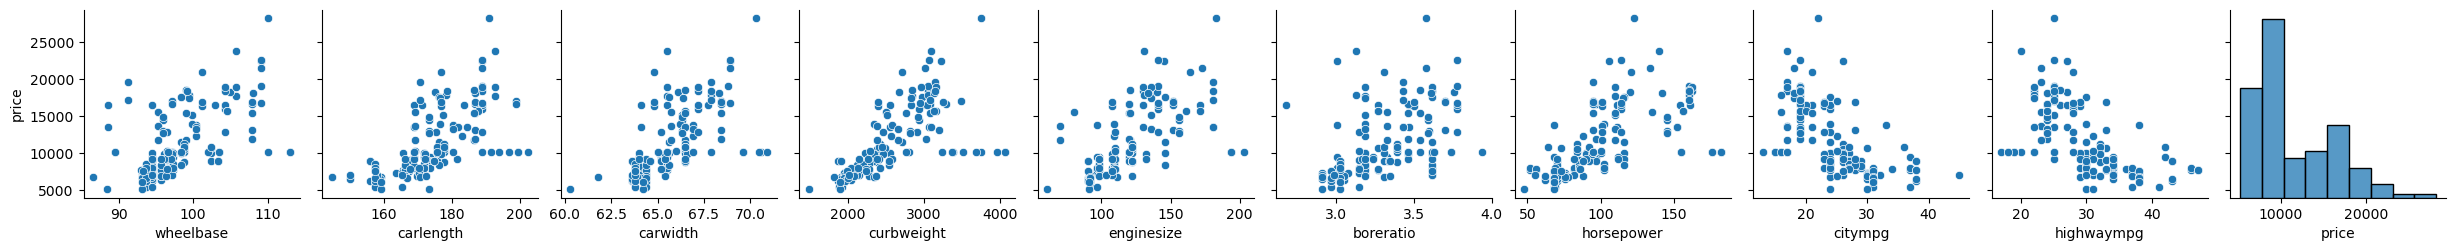

In [522]:
sns.pairplot(df_flo, y_vars = 'price');

In [523]:
#Видим, что 1) распределение цен скошено влево; 2) зависимость от предикторов экспоненциальная. Поэтому возьмем от цены логарифм
df_flo['ln_price'] = np.log(df_flo['price'])

In [524]:
#Посмотрим на VIF и будем выкидывать предикторы с максимальным значением пока не получим приемлемый результат
a = df_flo.drop(['price','ln_price'], axis=1)
VIF = pd.DataFrame()
VIF['feature'] = a.columns
VIF['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]

VIF

feature          VIF
0   wheelbase  1111.786233
1   carlength  1153.430289
2    carwidth  1300.979385
3  curbweight   165.981862
4  enginesize    45.059795
5   boreratio   341.012772
6  horsepower    37.437057
7     citympg   149.365784
8  highwaympg   213.173421

In [525]:
a = df_flo.drop(['ln_price','price','carwidth','carlength', 'curbweight','boreratio', 'enginesize','citympg', 'wheelbase'], axis=1)
VIF = pd.DataFrame()
VIF['feature'] = a.columns
VIF['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]

VIF

feature       VIF
0  horsepower  4.442553
1  highwaympg  4.442553

In [526]:
a = df_flo.drop(['ln_price','price','carlength', 'carwidth', 'wheelbase', 'highwaympg', 'curbweight', 'boreratio','horsepower'], axis=1)
VIF = pd.DataFrame()
VIF['feature'] = a.columns
VIF['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]

VIF

feature       VIF
0  enginesize  6.113315
1     citympg  6.113315

In [527]:
df_flo.drop(['carlength', 'carwidth', 'wheelbase', 'curbweight', 'boreratio'], axis=1, inplace=True)

In [528]:
df_flo

enginesize  horsepower  citympg  highwaympg    price   ln_price
0         146.0       116.0     24.0        30.0  11549.0   9.354354
1         108.0        82.0     28.0        33.0   7775.0   8.958669
2         145.0       106.0     26.0        27.0  22470.0  10.019936
3         121.0       110.0     21.0        28.0  11850.0   9.380083
4         130.0       111.0     21.0        27.0  13495.0   9.510075
..          ...         ...      ...         ...      ...        ...
145       141.0       114.0     23.0        28.0  12940.0   9.468079
146       122.0        88.0     24.0        30.0   8921.0   9.096163
147       181.0       160.0     19.0        25.0  17199.0   9.752607
148       156.0       145.0     19.0        24.0  12764.0   9.454384
149        91.0        68.0     31.0        38.0   6095.0   8.715224

[150 rows x 6 columns]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


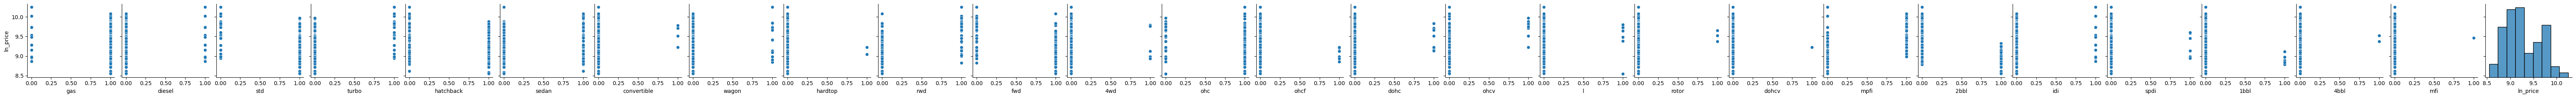

In [529]:
sns.pairplot(pd.merge(df_obj, df_flo['ln_price'], left_index=True, right_index=True), y_vars = 'ln_price')

In [530]:
#Посчитаем корреляцию номинальных переменных с логарифмом цены с помощью бисериальной корреляции. Оставим >0.4
for i in df_obj.columns:
    g = pointbiserialr(df_obj[i], df_flo['ln_price'])
    if g.pvalue<0.01 and abs(g.statistic)>0.4:
        print(f' {i} : {g}')

 std : SignificanceResult(statistic=-0.4019823245516023, pvalue=3.4177269554952417e-07)
 turbo : SignificanceResult(statistic=0.4019823245516023, pvalue=3.4177269554952417e-07)
 rwd : SignificanceResult(statistic=0.5523855059395846, pvalue=2.3353135963312674e-13)
 fwd : SignificanceResult(statistic=-0.5534181708672812, pvalue=2.0639992395231508e-13)
 mpfi : SignificanceResult(statistic=0.5818265480997916, pvalue=5.80669567761915e-15)
 2bbl : SignificanceResult(statistic=-0.6223780459218008, pvalue=1.8665653617356977e-17)


In [531]:
#не берем turbo тк он линейно зависим с std
df_obj = df_obj[['std','rwd','fwd','mpfi','2bbl']]

In [532]:
df_obj

std  rwd  fwd  mpfi  2bbl
0    1.0  1.0  0.0   1.0   0.0
1    1.0  0.0  1.0   0.0   1.0
2    0.0  1.0  0.0   0.0   0.0
3    1.0  0.0  1.0   1.0   0.0
4    1.0  1.0  0.0   1.0   0.0
..   ...  ...  ...   ...   ...
145  1.0  1.0  0.0   1.0   0.0
146  1.0  0.0  1.0   0.0   1.0
147  1.0  1.0  0.0   1.0   0.0
148  0.0  1.0  0.0   0.0   0.0
149  1.0  0.0  1.0   0.0   1.0

[150 rows x 5 columns]

### Модель 1

In [533]:
import statsmodels.api as sm

X = pd.merge(df_obj, df_flo.drop(['ln_price','price','highwaympg', 'horsepower'], axis=1), left_index=True, right_index=True)
Y = df_flo['ln_price']
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit(cov_type = 'HC0')
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     48.16
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           1.81e-34
Time:                        22:55:38   Log-Likelihood:                 16.572
No. Observations:                 150   AIC:                            -17.14
Df Residuals:                     142   BIC:                             6.940
Df Model:                           7                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2692      0.229     40.523      0.000       8.821       9.717
std           -0.2611      0.065     -3.996      0.000      -0.389      -0.133
rwd            0.0107      0.076      0.141      0.888      -0.138       0.159
fwd           -0.1184      0.073     -1.630      0.103      -0.261       0.024
mpfi           0.1380      0.067      2.045      0.041       0.006       0.270
2bbl          -0.1201      0.047     -2.576      0.010      -0.212      -0.029
enginesize     0.0039      0.001      3.220      0.001       0.002       0.006
citympg       -0.0085      0.004     -1.912      0.056      -0.017       0.000
==============================================================================
Omnibus:                        1.152   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                1.236
Skew:                          -0.198   Prob(JB):                        0.539
Kurtosis:                       2.797   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [534]:
VIF = pd.DataFrame()
VIF['feature'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

VIF

feature         VIF
0       const  118.835310
1         std    1.370732
2         rwd    8.168256
3         fwd    8.246609
4        mpfi    2.993465
5        2bbl    2.366912
6  enginesize    1.674826
7     citympg    2.465590

In [535]:
#Тест Уайта
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
test_result = sm.stats.diagnostic.het_white(results.resid, results.model.exog)
lzip(names, test_result)
#получается, гетероскедастичность

[('Lagrange multiplier statistic', 73.28789542265064),
 ('p-value', 1.2360348402844553e-06),
 ('f-value', 4.738599772475535),
 ('f p-value', 2.5503071791475167e-09)]

In [541]:
#Тест Дарбина-Уотсона
#Статистика Д-У 1.856
#По приблизительному правилу для случая с количеством наблюдей >100 автокорреляции нет если статистика от 1 до 2

### Модель 2

In [537]:
X = pd.merge(df_obj.drop(['rwd','fwd'],axis=1), df_flo.drop(['ln_price','price','citympg', 'enginesize', 'horsepower'], axis=1), left_index=True, right_index=True)
Y = df_flo['ln_price']
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit(cov_type = 'HC0')
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     63.94
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           4.61e-31
Time:                        22:55:38   Log-Likelihood:                0.51211
No. Observations:                 150   AIC:                             8.976
Df Residuals:                     145   BIC:                             24.03
Df Model:                           4                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0186      0.150     66.712      0.000       9.724      10.313
std           -0.2941      0.076     -3.896      0.000      -0.442      -0.146
mpfi           0.2105      0.073      2.895      0.004       0.068       0.353
2bbl          -0.1434      0.055     -2.588      0.010      -0.252      -0.035
highwaympg    -0.0184      0.004     -4.173      0.000      -0.027      -0.010
==============================================================================
Omnibus:                        0.483   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.785   Jarque-Bera (JB):                0.406
Skew:                          -0.127   Prob(JB):                        0.816
Kurtosis:                       2.978   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [538]:
VIF = pd.DataFrame()
VIF['feature'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

VIF

feature        VIF
0       const  48.728231
1         std   1.342412
2        mpfi   2.664518
3        2bbl   2.279569
4  highwaympg   1.843797

In [539]:
#Тест Уайта
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
test_result = sm.stats.diagnostic.het_white(results.resid, results.model.exog)
lzip(names, test_result)
#получается, гетероскедастичность

[('Lagrange multiplier statistic', 21.00012227484002),
 ('p-value', 0.012649878444203398),
 ('f-value', 2.5323168864990375),
 ('f p-value', 0.010117015596586515)]

In [542]:
#Тест Дарбина-Уотсона
#Статистика Д-У 1.918
#По приблизительному правилу для случая с количеством наблюдей >100 автокорреляции нет если статистика от 1 до 2